In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import scipy.stats as ss
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.metrics.cluster import adjusted_rand_score

In [30]:
df = pd.read_excel("data_lab3.xlsx", sheet_name = 0)
df = df.drop(columns=["Внутричерепное давление"])
X = new = df[["t36", "t35", "t34", "t33", "t32"]].copy()
df

,t36,t35,t34,t33,t32
0,37,35,33,28,26
1,38,33,30,28,25
2,33,34,30,31,29
3,45,30,27,28,19
4,36,31,29,27,25
5,44,40,37,33,28
6,35,33,28,27,25
7,34,29,28,26,24
8,39,34,31,29,24
9,38,36,33,29,25


In [31]:
df["Y_ward"] = 0
df

,t36,t35,t34,t33,t32,Y_ward
0,37,35,33,28,26,0
1,38,33,30,28,25,0
2,33,34,30,31,29,0
3,45,30,27,28,19,0
4,36,31,29,27,25,0
5,44,40,37,33,28,0
6,35,33,28,27,25,0
7,34,29,28,26,24,0
8,39,34,31,29,24,0
9,38,36,33,29,25,0


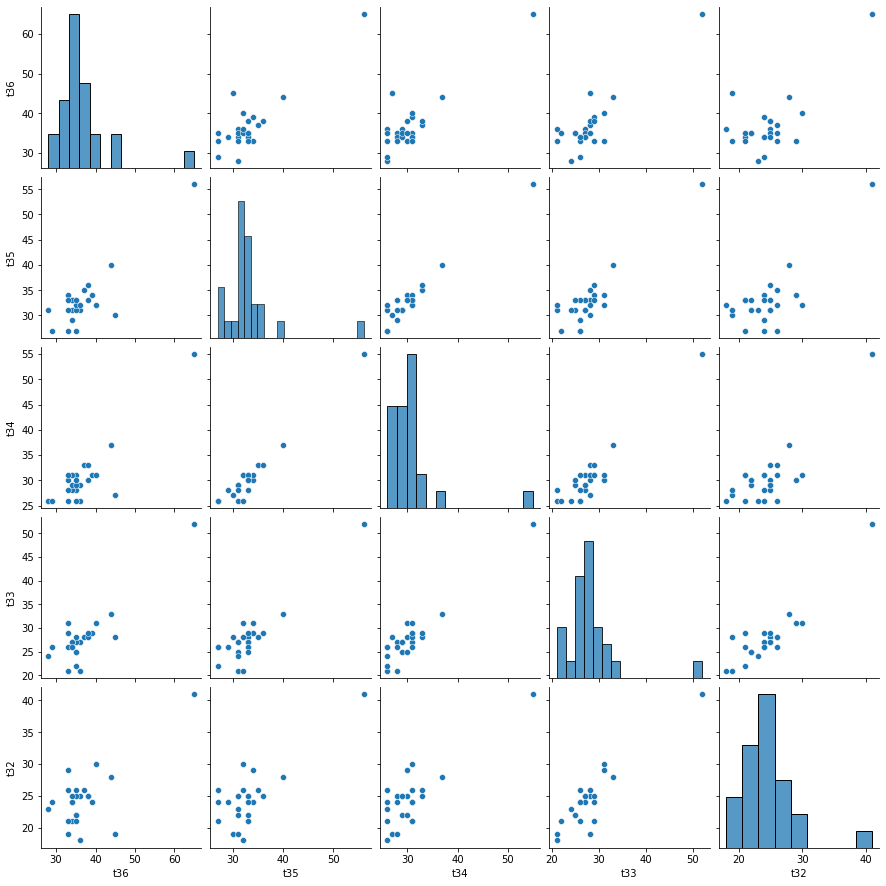

In [20]:
# Матриця діаграм розсіювання 

sb.pairplot(X)

# Виділяються 2 кластери, у другому лише 1 об'єкт 

<AxesSubplot:>

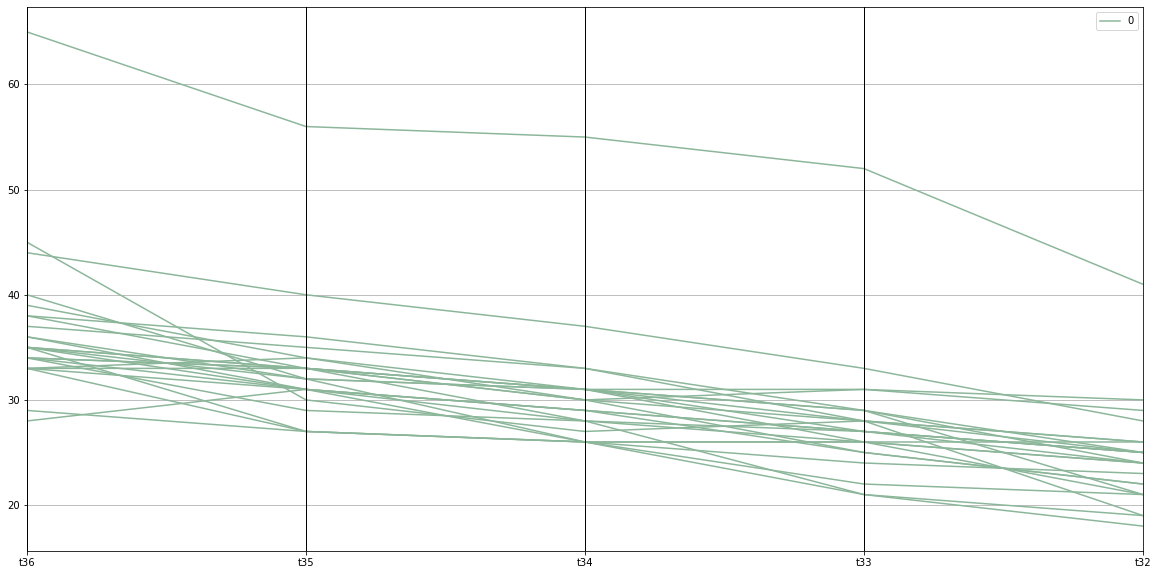

In [21]:
# Гррафік паралельних координат 

plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df, class_column="Y_ward")

# Також виділяються 2 кластери, у другому лише 1 об'єкт

In [32]:
# Розбиття пацієнтів на кластери за допомогою різних ієрархічних алгоритмів кластеризації

# Найкращим обрано розбиття на 2 кластери

agglomerative = AgglomerativeClustering(n_clusters=2).fit(X)

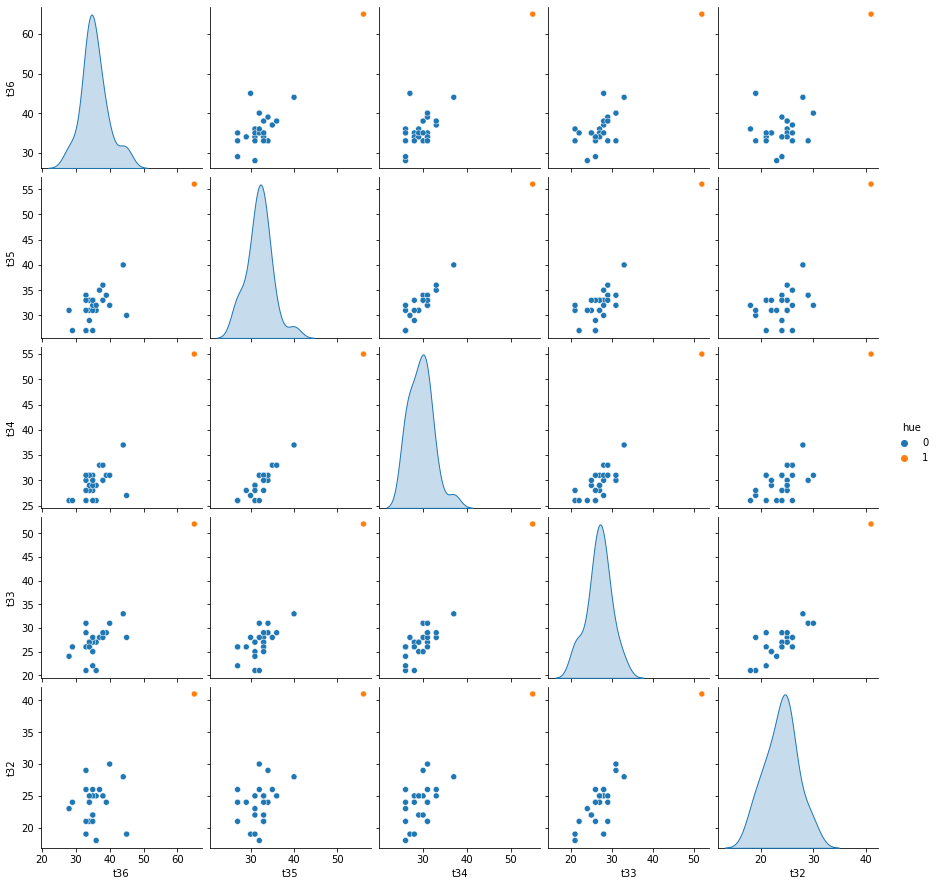

In [8]:
sb.pairplot(X.assign(hue=agglomerative.labels_), hue='hue')

In [33]:
df["Y_ward"] = agglomerative.labels_
df

,t36,t35,t34,t33,t32,Y_ward
0,37,35,33,28,26,0
1,38,33,30,28,25,0
2,33,34,30,31,29,0
3,45,30,27,28,19,0
4,36,31,29,27,25,0
5,44,40,37,33,28,0
6,35,33,28,27,25,0
7,34,29,28,26,24,0
8,39,34,31,29,24,0
9,38,36,33,29,25,0


<AxesSubplot:>

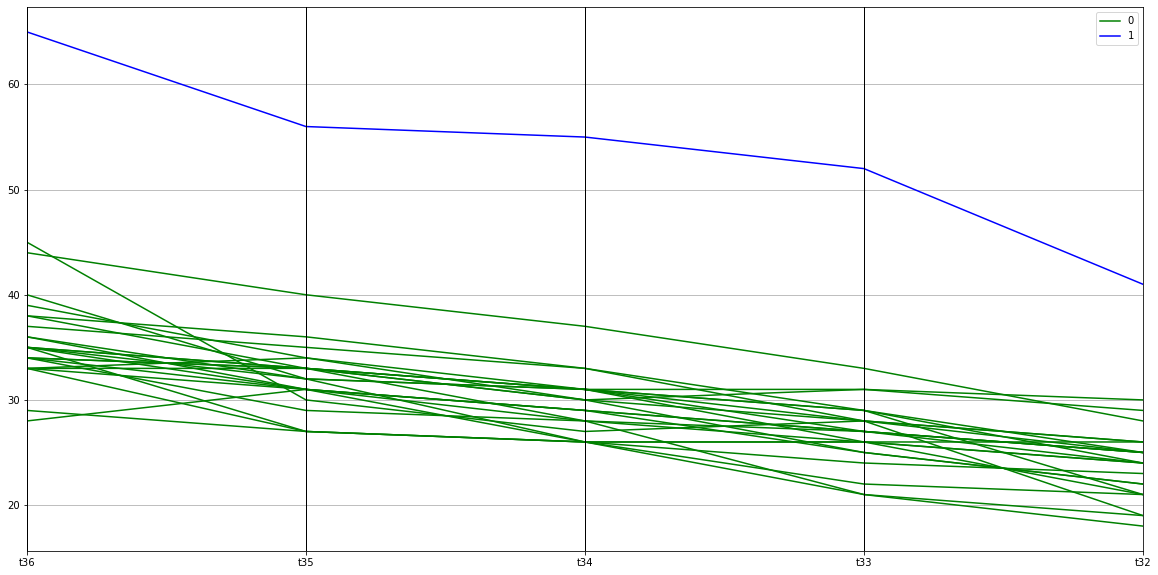

In [10]:
plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df, class_column="Y_ward", color=['g','b'])

<AxesSubplot:>

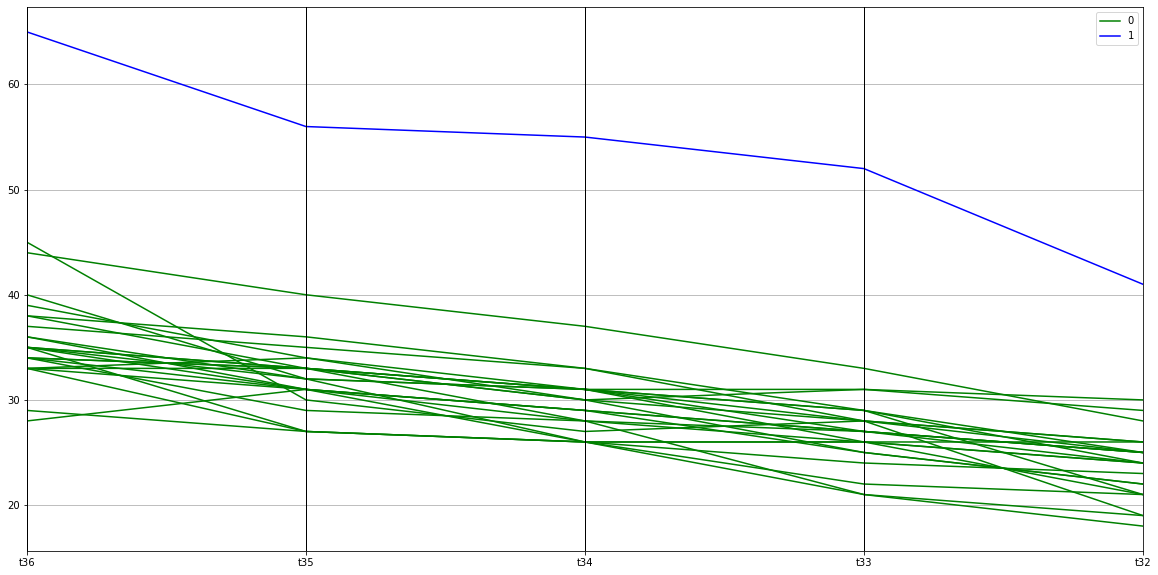

In [34]:
agglomerative2 = AgglomerativeClustering(n_clusters=2, linkage='average').fit(X)
df["Y_average"] = agglomerative2.labels_
plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df[['t36', 't35', 't34', 't33', 't32', 'Y_average']], class_column="Y_average", color=['g','b'])

<AxesSubplot:>

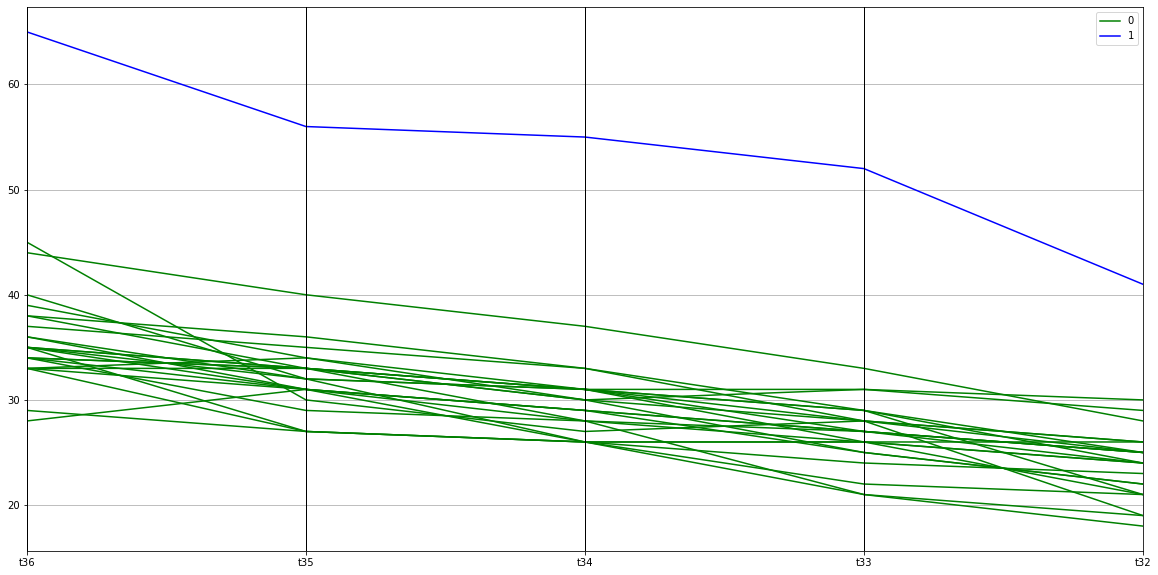

In [35]:
agglomerative3 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)
df["Y_complete"] = agglomerative3.labels_
plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df[['t36', 't35', 't34', 't33', 't32', 'Y_complete']], class_column="Y_complete", color=['g','b'])

<AxesSubplot:>

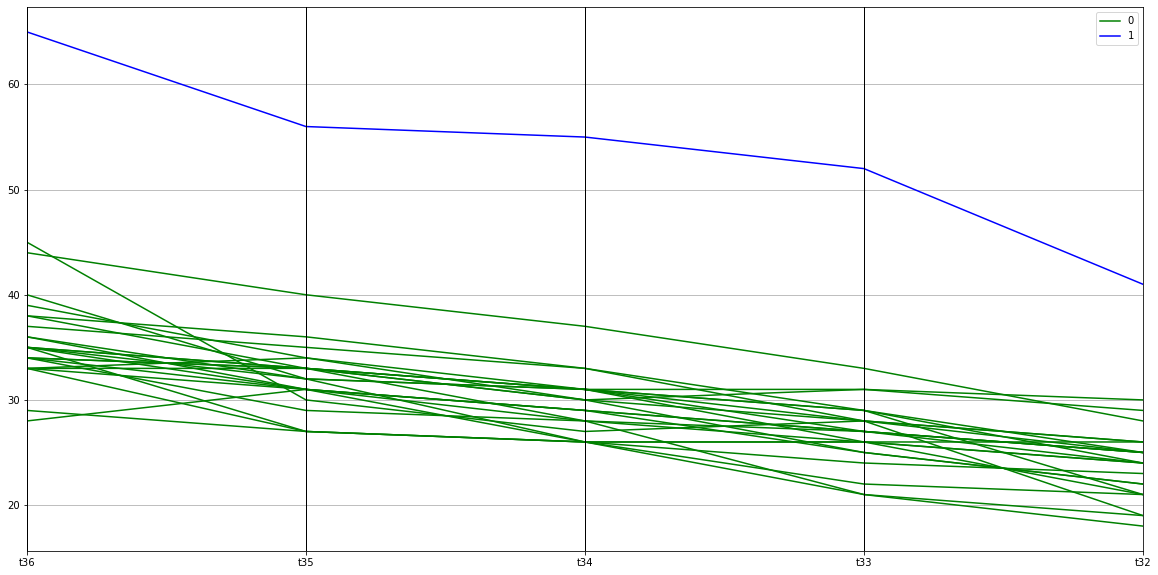

In [36]:
agglomerative4 = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
df["Y_single"] = agglomerative4.labels_
plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df[['t36', 't35', 't34', 't33', 't32', 'Y_single']], class_column="Y_single", color=['g','b'])

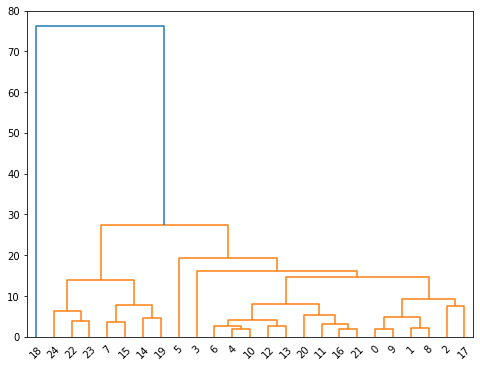

In [14]:
plt.figure(figsize=(8, 6))
dendrogram = dendrogram(linkage(X, method="ward"))

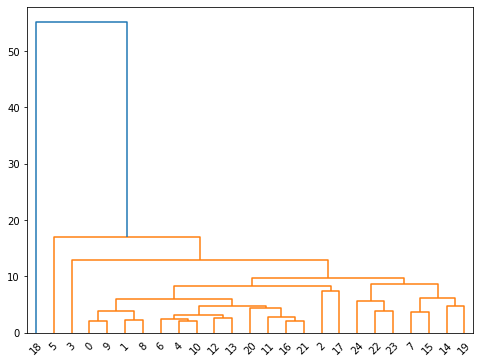

In [24]:
plt.figure(figsize=(8, 6))
dendrogram2 = dendrogram(linkage(X, method="average"))

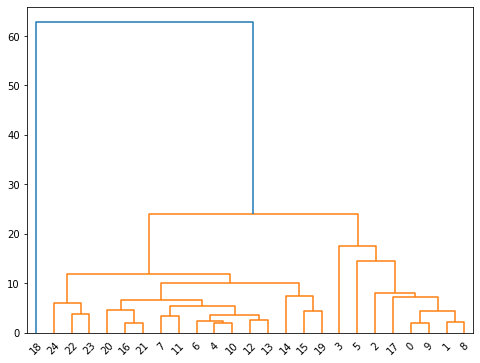

In [25]:
plt.figure(figsize=(8, 6))
dendrogram3 = dendrogram(linkage(X, method="complete"))

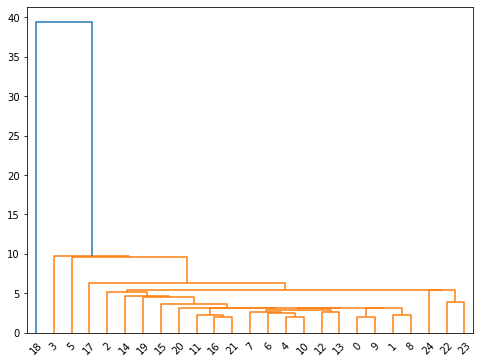

In [26]:
plt.figure(figsize=(8, 6))
dendrogram4 = dendrogram(linkage(X, method="single"))

In [37]:
# 4. Розбити пацієнтів на кластери за допомогою алгоритму k-середніх. 
# В процесі кластеризації проекспериментувати із запуском алгоритму k-середніх за різних варіантів ініціалізації та різної кількості кластерів. 
# Які значення параметрів алгоритму є кращими? У цьому пункті результати кластеризації також доцільно візуалізувати на графіку паралельних координат,
# де лінії, що відповідають пацієнтам з різних кластерів, помічені різними кольорами. 

kmeans = KMeans(n_clusters=2).fit(X)

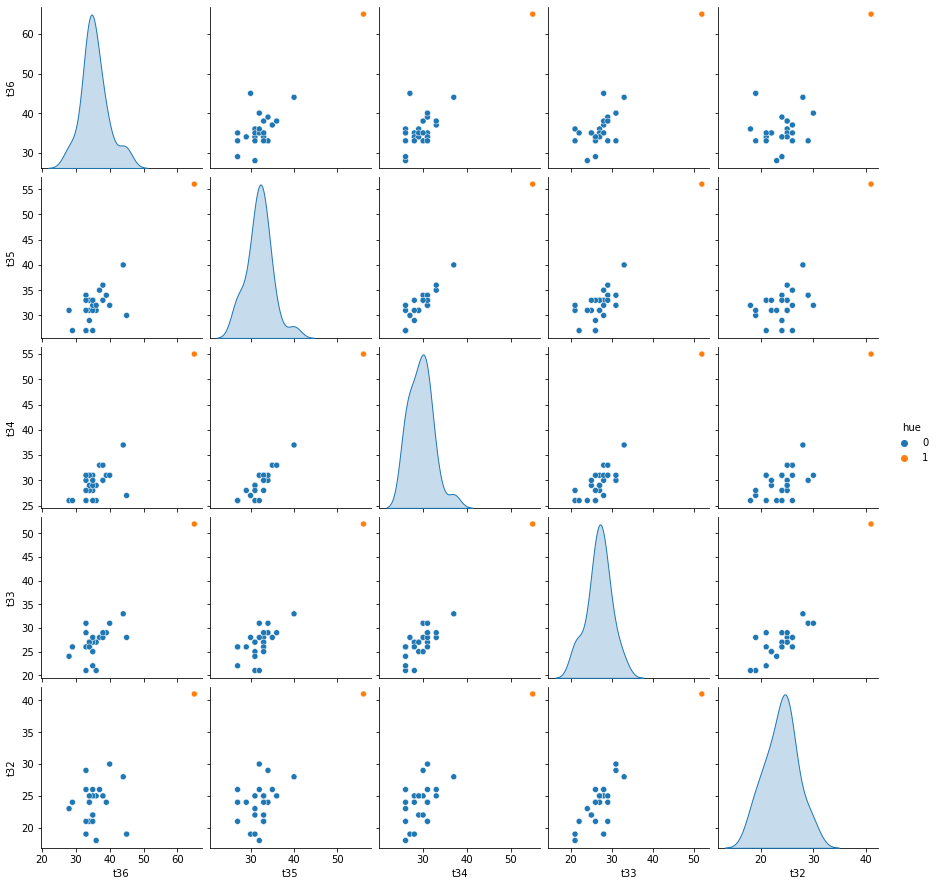

In [28]:
sb.pairplot(X.assign(hue=kmeans.labels_), hue='hue')

In [38]:
df["Y_KMeans"] = kmeans.labels_
df

,t36,t35,t34,t33,t32,Y_ward,Y_average,Y_complete,Y_single,Y_KMeans
0,37,35,33,28,26,0,0,0,0,0
1,38,33,30,28,25,0,0,0,0,0
2,33,34,30,31,29,0,0,0,0,0
3,45,30,27,28,19,0,0,0,0,0
4,36,31,29,27,25,0,0,0,0,0
5,44,40,37,33,28,0,0,0,0,0
6,35,33,28,27,25,0,0,0,0,0
7,34,29,28,26,24,0,0,0,0,0
8,39,34,31,29,24,0,0,0,0,0
9,38,36,33,29,25,0,0,0,0,0


<AxesSubplot:>

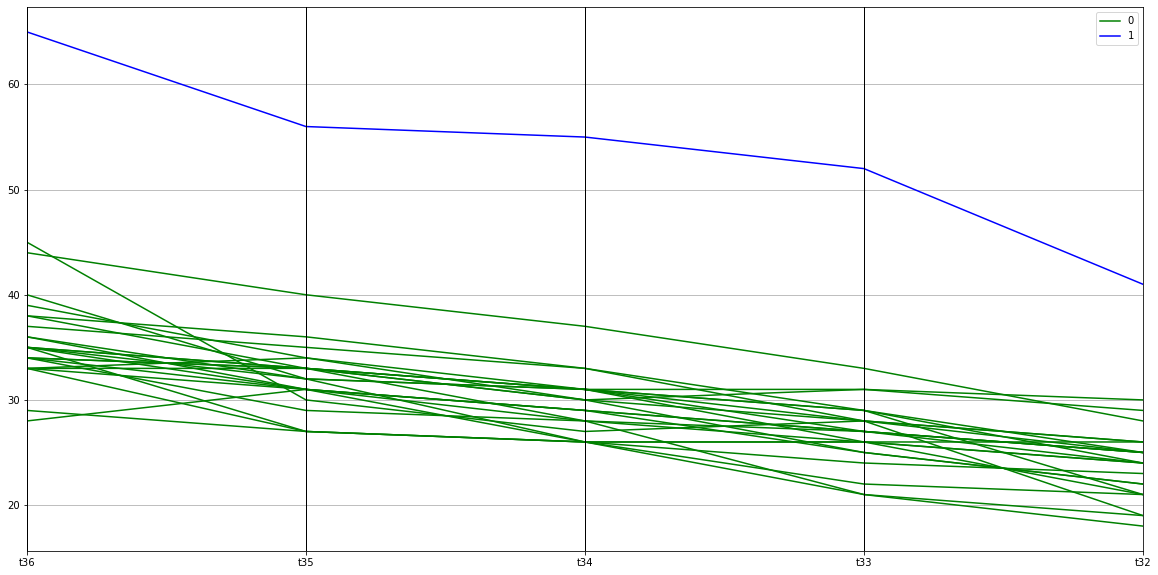

In [40]:
plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df[["Y_KMeans", "t36", "t35", "t34", "t33", "t32"]], class_column="Y_KMeans", color=['g', 'b'])

In [41]:
# calinski_harabasz_scor

calinski_harabasz_score(X, kmeans.fit_predict(X))

59.272049707818645

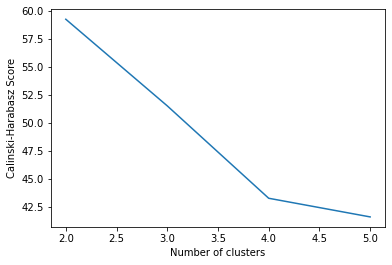

In [42]:
results = {}
for i in range(2,6):
    kmeansCH = KMeans(n_clusters=i)
    labels = kmeansCH.fit_predict(X)
    ch_index = calinski_harabasz_score(X, labels)
    results.update({i: ch_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

In [43]:
# davies_bouldin_score

davies_bouldin_score(df, kmeans.fit_predict(X))

0.10802299801081246

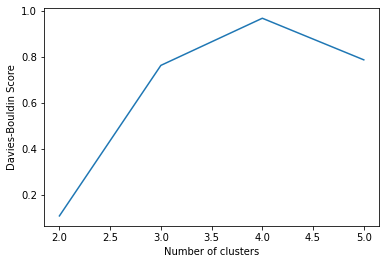

In [44]:
results = {}
for i in range(2,6):
    kmeansDB = KMeans(n_clusters=i)
    labels = kmeansDB.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Score")
plt.show()

In [45]:
# silhouette_score

silhouette_score(df, kmeans.fit_predict(df))

0.8017147883421135

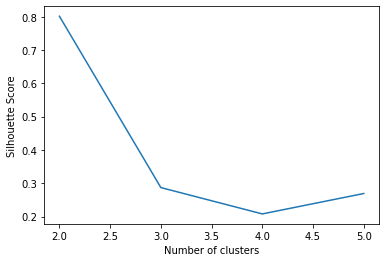

In [46]:
results = {}
for i in range(2,6):
    kmeansS = KMeans(n_clusters=i)
    labels = kmeansS.fit_predict(X)
    s_index = silhouette_score(X, labels)
    results.update({i: s_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [49]:
# adjusted_rand_score

print("Y_ward and Y_average: ", adjusted_rand_score(df["Y_ward"], df["Y_average"]))
print("Y_ward and Y_complete: ", adjusted_rand_score(df["Y_ward"], df["Y_complete"]))
print("Y_ward and Y_single: ", adjusted_rand_score(df["Y_ward"], df["Y_single"]))
print("Y_ward and Y_KMeans: ", adjusted_rand_score(df["Y_ward"], df["Y_KMeans"]))

Y_ward and Y_average:  1.0
Y_ward and Y_complete:  1.0
Y_ward and Y_single:  1.0
Y_ward and Y_KMeans:  1.0


In [50]:
# Всі алгоритми дали однаковий результат. Найкраще розбиття за тестами і з фізичної точки зору на 2 кластери.